# Import libraries and setup

In [140]:
%load_ext rpy2.ipython
import rpy2.rinterface
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [3]:
%matplotlib inline

# Read in data and adjust dataframe

In [4]:
# Read in data
df_orig = pd.read_csv('Experiment_result_final_1507.csv')
df_orig.head()

,Subject,Group,Age,Gender,Phase,TrialNum,KeyPress,Accuracy,CurrentScore,RT,Response,AffixUsed,StemAlternation,AlienWord,Picture,CorrectAffix,StemShouldAlternate
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11.0,1.0,26.0,m,affixedtest,1.0,a,0.0,205.0,6034,other_error,error,error,nijaku,melon2,ni,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11.0,1.0,26.0,m,affixedtest,2.0,f,1.0,215.0,5000,ba_correct,ba,no,bakuta,kitten2,ba,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Grab only the English subjects (through sub #297) and remove pilot data, which was first 10 subjects
df = df_orig[(df_orig['Subject'] > 10) & (df_orig['Subject'] < 407)].copy()
df.head()
print('Number of participants: ',df['Subject'].nunique())

Number of participants:  325


In [6]:
# Remove participants to be excluded due to inclusion/exclusion criteria
# Most of these (all except 1) were already removed from the csv file, so only 1 more gets removed
exclude_list = [21,30,107,110,111,
                37,38,40,43,46,47,48,50,54,58,59,95,97,99,103,
                66,68,69,78,79,82,88,89,93,
                115,116,119,123,131,
                168,
                176,181,185,187,193,
                233,248,
                201,205,214,215,218,220,
                261,262,263,264,266,267,270,272,281,288,289,290,291,
                300,302,319,325,363,384,388,390]
df = df[~df['Subject'].isin(exclude_list)]

# Check that the numbers add up in terms of data and # of participants
print("Number of unique participants remaining: ", len(df['Subject'].unique()))
print("Number of expected participants, based on number of trials: ", len(df)/60)



# Show the unique subjects remaining
df.Subject.unique()

Number of unique participants remaining:  324
Number of expected participants, based on number of trials:  324.0


array([ 11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  31.,  32.,  33.,  34.,
        35.,  36.,  39.,  41.,  42.,  44.,  45.,  49.,  51.,  52.,  53.,
        55.,  56.,  57.,  60.,  61.,  62.,  63.,  64.,  65.,  67.,  70.,
        71.,  72.,  73.,  74.,  75.,  76.,  77.,  80.,  81.,  83.,  84.,
        85.,  86.,  87.,  90.,  91.,  92.,  94.,  96.,  98., 100., 101.,
       102., 104., 105., 106., 108., 109., 112., 113., 114., 117., 118.,
       120., 121., 122., 124., 125., 126., 127., 128., 129., 130., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 151., 152., 153., 154.,
       155., 156., 157., 158., 159., 160., 161., 162., 163., 164., 165.,
       166., 167., 169., 170., 171., 172., 173., 174., 175., 177., 178.,
       179., 180., 182., 183., 184., 186., 188., 189., 190., 191., 192.,
       194., 195., 196., 197., 198., 199., 200., 20

In [7]:
dfk=df[(df['Subject']>300) & (df['Subject']<407)].copy()
print('number of subject in Korean data:', len(dfk['Subject'].unique()))


number of subject in Korean data: 99


In [8]:
df['Subject'] ==205

1        False
3        False
5        False
7        False
9        False
         ...  
38991    False
38993    False
38995    False
38997    False
38999    False
Name: Subject, Length: 19440, dtype: bool

In [9]:
#Show the number of female subject
dfw = df[(df['Gender'] == 'f')]
dfw.head()
print("Number of unique women participants remaining:" , len(dfw)/60)
#show the mean age of all remaining subject
df['total'] = df['Age'].sum()
(df['total'].div(60)).div(225)

Number of unique women participants remaining: 226.0


1        34.155556
3        34.155556
5        34.155556
7        34.155556
9        34.155556
           ...    
38991    34.155556
38993    34.155556
38995    34.155556
38997    34.155556
38999    34.155556
Name: total, Length: 19440, dtype: float64

In [10]:
##Number of female and the average age of Korean data
dfkw=dfk[(dfk['Gender'] =='f')]
print("number of female participants:", len(dfkw)/60)

dfk['sumage']=dfk['Age'].sum()
print("the mean age of the participant:", (dfk['sumage']/60)/99)

number of female participants: 65.0
the mean age of the participant: 27121    23.535354
27123    23.535354
27125    23.535354
27127    23.535354
27129    23.535354
           ...    
38991    23.535354
38993    23.535354
38995    23.535354
38997    23.535354
38999    23.535354
Name: sumage, Length: 5940, dtype: float64


In [10]:
# Drop the StemShouldAlternate column because it seems to have errors 
# (and we will recalculate an equivalant based on other columns)
df.drop(columns=['StemShouldAlternate'],inplace=True)
df.head()

,Subject,Group,Age,Gender,Phase,TrialNum,KeyPress,Accuracy,CurrentScore,RT,Response,AffixUsed,StemAlternation,AlienWord,Picture,CorrectAffix,total
1,11.0,1.0,26.0,m,affixedtest,1.0,a,0.0,205.0,6034,other_error,error,error,nijaku,melon2,ni,461100.0
3,11.0,1.0,26.0,m,affixedtest,2.0,f,1.0,215.0,5000,ba_correct,ba,no,bakuta,kitten2,ba,461100.0
5,11.0,1.0,26.0,m,affixedtest,3.0,j,0.0,220.0,7279,ni_nochange,ni,no,bagapi,fork2,ba,461100.0
7,11.0,1.0,26.0,m,affixedtest,4.0,f,1.0,230.0,3329,ba_correct,ba,no,baputi,bird2,ba,461100.0
9,11.0,1.0,26.0,m,affixedtest,5.0,f,1.0,240.0,5792,ba_correct,ba,no,bagaku,melon2,ba,461100.0


### Check the dataframe for errors

In [12]:
# Check that each subject has 60 trials as expected
df.groupby('Subject')['Phase'].value_counts().sort_values(ascending=False)

Subject  Phase      
406.0    affixedtest    60
165.0    affixedtest    60
147.0    affixedtest    60
148.0    affixedtest    60
149.0    affixedtest    60
                        ..
286.0    affixedtest    60
287.0    affixedtest    60
292.0    affixedtest    60
293.0    affixedtest    60
11.0     affixedtest    60
Name: Phase, Length: 324, dtype: int64

In [13]:
df.groupby('Group')['Subject'].value_counts()

Group  Subject
1.0    11.0       60
       12.0       60
       13.0       60
       14.0       60
       15.0       60
                  ..
13.0   402.0      60
       403.0      60
       404.0      60
       405.0      60
       406.0      60
Name: Subject, Length: 324, dtype: int64

In [14]:
### Check that each column has only the expected values
# Age - should be numeric
df.Age.value_counts().sort_values()

54.0      60
37.0      60
56.0      60
57.0      60
46.0      60
49.0      60
5.0       60
44.0      60
45.0      60
58.0      60
47.0      60
59.0      60
35.0     120
33.0     120
38.0     120
39.0     120
43.0     120
32.0     120
29.0     180
30.0     180
31.0     180
27.0     300
28.0     480
26.0     720
18.0     900
19.0    1320
25.0    1380
24.0    1620
21.0    1920
23.0    2160
20.0    3180
22.0    3480
Name: Age, dtype: int64

In [15]:
# Gender, should be m, f, or o
df.Gender.value_counts().sort_values()

m     5880
f    13560
Name: Gender, dtype: int64

In [16]:
# Phase, should be only 'affixedtest'
df.Phase.value_counts().sort_values()

affixedtest    19440
Name: Phase, dtype: int64

In [17]:
# TrialNum, should be 1-60 only
df.TrialNum.value_counts().sort_index()

1.0     324
2.0     324
3.0     324
4.0     324
5.0     324
6.0     324
7.0     324
8.0     324
9.0     324
10.0    324
11.0    324
12.0    324
13.0    324
14.0    324
15.0    324
16.0    324
17.0    324
18.0    324
19.0    324
20.0    324
21.0    324
22.0    324
23.0    324
24.0    324
25.0    324
26.0    324
27.0    324
28.0    324
29.0    324
30.0    324
31.0    324
32.0    324
33.0    324
34.0    324
35.0    324
36.0    324
37.0    324
38.0    324
39.0    324
40.0    324
41.0    324
42.0    324
43.0    324
44.0    324
45.0    324
46.0    324
47.0    324
48.0    324
49.0    324
50.0    324
51.0    324
52.0    324
53.0    324
54.0    324
55.0    324
56.0    324
57.0    324
58.0    324
59.0    324
60.0    324
Name: TrialNum, dtype: int64

In [18]:
# KeyPress, should be from {v, a, r, u, m, j, f, none}
df.KeyPress.value_counts().sort_values()

a        188
v        197
none     350
r        742
u        856
m       1573
j       7135
f       8399
Name: KeyPress, dtype: int64

In [19]:
# Accuracy, should be from {0, 1}
df.Accuracy.value_counts().sort_values()

1.0     8682
0.0    10758
Name: Accuracy, dtype: int64

In [20]:
# RT, should all be numeric or timeout
df[df.RT != 'timeout'].RT.str.isnumeric().value_counts().sort_values()

True    19089
Name: RT, dtype: int64

In [21]:
# Response, should match the counts from KeyPress above
respdf = df.Response.value_counts().sort_values()
print(respdf)

print('\n')
print("Total 'error': ", respdf.iloc[0])
print("Total 'none': ", respdf.iloc[2])
print("Total 'ba': ", respdf.iloc[1]+respdf.iloc[3]+respdf.iloc[-1])
print("Total 'ni': ", respdf.iloc[4]+respdf.iloc[5]+respdf.iloc[6])

other_error     188
ba_change       197
none            350
ba_error        742
ni_error        855
ni_change      1575
ni_nochange    7134
ba_correct     8399
Name: Response, dtype: int64


Total 'error':  188
Total 'none':  350
Total 'ba':  9338
Total 'ni':  9564


In [22]:
# AffixUsed, should be from {ba, ni, error, none}; values should match with above.
df.AffixUsed.value_counts().sort_values()

error     188
none      350
ba       9338
ni       9564
Name: AffixUsed, dtype: int64

In [23]:
# StemAlternation, should be {yes, no, error, na}; na should match none
df.StemAlternation.value_counts().sort_values()

na         350
yes       1772
error     1785
no       15533
Name: StemAlternation, dtype: int64

In [24]:
# Check number of characters in AlienWord. Should be 6 or 7 for all.
df.AlienWord.apply(lambda x: len(x)).sort_values()

1        6
24929    6
24931    6
24933    6
24937    6
        ..
21051    7
24713    7
3539     7
7707     7
8927     7
Name: AlienWord, Length: 19440, dtype: int64

In [25]:
df.AlienWord.sort_values().unique()

array(['babagu', 'bachimu', 'badapi', 'bagaku', 'bagapi', 'bajapi',
       'bakimu', 'bakuta', 'bamipa', 'baniba', 'baputi', 'batimu',
       'nibagu', 'nichimu', 'nichuta', 'nidapi', 'nigaku', 'nigapi',
       'nijaku', 'nijapi', 'nikimu', 'nikuta', 'nimipa', 'niniba',
       'niputi', 'nitimu'], dtype=object)

In [26]:
# Picture, should be one of 10 pictures, occurring equally.
df.Picture.value_counts().sort_values()

carrot2        1944
egg2           1944
bird2          1944
bucket2        1944
melon2         1944
strawberry2    1944
pillow2        1944
flower2        1944
kitten2        1944
fork2          1944
Name: Picture, dtype: int64

In [27]:
# Correct Affix, should be from {ba, ni}; values should match proportion breakdown in each group
df.groupby('Group').CorrectAffix.value_counts().sort_index()

Group  CorrectAffix
1.0    ba              1000
       ni               500
2.0    ba               720
       ni               720
3.0    ba               520
       ni              1040
4.0    ba              1040
       ni               520
5.0    ba               750
       ni               750
6.0    ba               480
       ni               960
7.0    ba               750
       ni               750
8.0    ba              1000
       ni               500
9.0    ba               500
       ni              1000
10.0   ba              1000
       ni               500
11.0   ba               501
       ni               999
12.0   ba              1000
       ni               500
13.0   ba               480
       ni               960
Name: CorrectAffix, dtype: int64

In [28]:
# Check for null cells
df[df.isnull().any(axis=1)]
# The null cell is due to value missing in one of the original data files for Sub 271, trial 60 
# (not clear why it is missing)

,Subject,Group,Age,Gender,Phase,TrialNum,KeyPress,Accuracy,CurrentScore,RT,Response,AffixUsed,StemAlternation,AlienWord,Picture,CorrectAffix,total
24719,271.0,9.0,22.0,f,affixedtest,60.0,r,0.0,530.0,NaN,ba_error,ba,error,nibagu,bucket2,ni,461100.0


In [29]:
df.groupby('Group').CorrectAffix.value_counts()

Group  CorrectAffix
1.0    ba              1000
       ni               500
2.0    ba               720
       ni               720
3.0    ni              1040
       ba               520
4.0    ba              1040
       ni               520
5.0    ba               750
       ni               750
6.0    ni               960
       ba               480
7.0    ba               750
       ni               750
8.0    ba              1000
       ni               500
9.0    ni              1000
       ba               500
10.0   ba              1000
       ni               500
11.0   ni               999
       ba               501
12.0   ba              1000
       ni               500
13.0   ni               960
       ba               480
Name: CorrectAffix, dtype: int64

In [30]:
# Remove rows with null cells
df = df[df.notnull().all(axis=1)]
len(df)

19439

In [31]:
df.RT.value_counts()

timeout    350
2590        35
3241        33
3190        33
2221        32
          ... 
7639         1
3575         1
1076         1
8652         1
6083         1
Name: RT, Length: 5176, dtype: int64

In [32]:
df.StemAlternation.value_counts()

no       15533
error     1784
yes       1772
na         350
Name: StemAlternation, dtype: int64

In [33]:
# Remove data where a timeout (no response in time period) was recorded
df = df[df['RT']!='timeout']

# Remove errors
df = df[df['StemAlternation'] != 'error']

In [34]:
# Check number of rows in dataframe remaining
print(len(df))


17305


### Add columns to df

In [35]:
# Add column for whether ni- was used
df['UsedNi'] = df['AffixUsed'].apply(lambda x: 1 if x=='ni' else 0)

In [36]:
###make groups Alternation type + Prefix Frequency
conditions  = [
    df.Subject.isin(list(range(11,21))+list(range(22,30))+[31,32,108,109,112,113,114]),
    df.Subject.isin([33,34,35,36,39,41,42,44,45,49,51,52,53,55,56,57,96,98,100,101,102,104,105,106]),
    df.Subject.isin(list(range(60,66))+[67]+list(range(70,78))+[80,81,83,84,85,86,87,90,91,92,94]),
    df.Subject.isin([117,118,120,121,122]+list(range(124,131))+[132,133,134,135,136,139,143,144,146,147,148,149,150,151]),
    df.Subject.isin([137,138,140,141,142,145]+list(range(152,168))+[169,170,171]),
    df.Subject.isin([172,173,174,175,177,178,179,180,182,183,184,186,188,189,190,191,192,194,195,196,197,198,199,200]),
    df.Subject.isin([232]+list(range(234,248))+list(range(249,259))),
    df.Subject.isin([202,203,204]+list(range(206,214))+[216,217,219]+list(range(221,232))),
    df.Subject.isin([260,265,268,269,271]+list(range(273,281))+[282,283,284,285,286,287]+list(range(292,298))),
    df.Subject.isin([301]+list(range(303,316))+list(range(349, 360))),
    df.Subject.isin([316,317,318,320,321,322,323,324,326,327,328,360,361,362]+list(range(364,375))),
    df.Subject.isin([329,330]+list(range(332,340))+list(range(375,384))+[385,386,387,389,391,392]),
    df.Subject.isin([331]+list(range(340,349))+ list(range(393,398))+list(range(398,407)))
]
groups = ['freqba_alt_nonneut',
          '5050_alt_nonneut',
          'freqni_alt_nonneut',
          'freqba_nonalt_nonneut',
          '5050_nonalt_nonneut',
          'freqni_nonalt_nonneut',
          'freqba_neut',
          '5050_neut',
          'freqni_neut',
          'freqba_alt_nonneut_k',
          'freqni_alt_nonneut_k',
          'freqba_neut_k',
          'freqni_neut_k'
]

df['Group'] = np.select(conditions,groups)

In [37]:
# Check number of participants in each group
df.groupby('Group')['Subject'].nunique()

Group
5050_alt_nonneut         24
5050_neut                25
5050_nonalt_nonneut      25
freqba_alt_nonneut       25
freqba_alt_nonneut_k     25
freqba_neut              25
freqba_neut_k            25
freqba_nonalt_nonneut    26
freqni_alt_nonneut       26
freqni_alt_nonneut_k     25
freqni_neut              25
freqni_neut_k            24
freqni_nonalt_nonneut    24
Name: Subject, dtype: int64

In [38]:
#\ Devide Prefix Frequency by Groups##
conditions=[
    df.Group.isin(['5050_alt_nonneut', '5050_neut','5050_nonalt_nonneut']),
    df.Group.isin(['freqba_alt_nonneut', 'freqba_alt_nonneut_k','freqba_neut','freqba_neut_k','freqba_nonalt_nonneut' ]),
    df.Group.isin(['freqni_alt_nonneut','freqni_alt_nonneut_k', 'freqni_neut', 'freqni_neut_k','freqni_nonalt_nonneut'])
]

groups=[
    '5050',
    'freqba',
    'freqni'

]
df['FreqCondition']=np.select(conditions,groups)
##Devide Alternation Type by Group##


In [41]:

conditions=[ df.Group.isin(['5050_nonalt_nonneut','freqba_nonalt_nonneut','freqni_nonalt_nonneut']),
            df.Group.isin(['5050_alt_nonneut','freqba_alt_nonneut','freqni_alt_nonneut','freqba_alt_nonneut_k','freqni_alt_nonneut_k']),
            df.Group.isin(['5050_neut','freqba_neut','freqni_neut','freqba_neut_k','freqni_neut_k'])
]
groups=[
        'nonalternation',
        'alternation',
        'neutralization'
]

df['AltCondition']=np.select(conditions, groups)

In [39]:
df.head()

,Subject,Group,Age,Gender,Phase,TrialNum,KeyPress,Accuracy,CurrentScore,RT,Response,AffixUsed,StemAlternation,AlienWord,Picture,CorrectAffix,total,UsedNi,FreqCondition
3,11.0,freqba_alt_nonneut,26.0,m,affixedtest,2.0,f,1.0,215.0,5000,ba_correct,ba,no,bakuta,kitten2,ba,461100.0,0,freqba
5,11.0,freqba_alt_nonneut,26.0,m,affixedtest,3.0,j,0.0,220.0,7279,ni_nochange,ni,no,bagapi,fork2,ba,461100.0,1,freqba
7,11.0,freqba_alt_nonneut,26.0,m,affixedtest,4.0,f,1.0,230.0,3329,ba_correct,ba,no,baputi,bird2,ba,461100.0,0,freqba
9,11.0,freqba_alt_nonneut,26.0,m,affixedtest,5.0,f,1.0,240.0,5792,ba_correct,ba,no,bagaku,melon2,ba,461100.0,0,freqba
11,11.0,freqba_alt_nonneut,26.0,m,affixedtest,6.0,f,0.0,245.0,5699,ba_correct,ba,no,niniba,strawberry2,ni,461100.0,0,freqba


In [42]:
# Add column for whether they are in a group with alternations
df['Alternations'] = df['AltCondition'].isin(['alternation','neutralization']).apply(lambda x: 'yes' if x == True else 'no')

# Add column for whether they are in the neutralization group
df['Neutralization'] = df['AltCondition'].isin(['neutralization']).apply(lambda x: 'yes' if x == True else 'no')

In [44]:
# Add column for initial stem C
conditions = [
    df.Picture=='kitten2',
    df.Picture=='melon2',
    df.Picture=='flower2',
    df.Picture=='fork2',
    df.Picture=='bird2',
    df.Picture=='strawberry2',
    df.Picture=='pillow2',
    df.Picture=='carrot2',
    df.Picture=='bucket2',
    df.Picture=='egg2'
]
groups = ['k',
          'g',
          'k',
          'g',
          'p',
          'n',
          'm',
          't',
          'b',
          'd'
]

df['InitialStemC'] = np.select(conditions,groups,default="problem")

## Check that there are no problem in the new column; no problems if all are False
(df['InitialStemC']=='problem').sort_values()

3        False
25995    False
25997    False
25999    False
26001    False
         ...  
13163    False
13165    False
13167    False
13135    False
38999    False
Name: InitialStemC, Length: 17305, dtype: bool

In [45]:
# Add column for what the frequent prefix was (arbitrarily ba- in 50-50 group)
#df['FreqPrefix'] = df['Group'].isin(['freqni_alt_nonneut','freqni_nonalt_nonneut','freqni_neut']).apply(lambda x: 'ni' if x == True else 'ba')

df['FreqPrefix']=df['Group'].isin(['freqni_alt_nonneut','freqni_alt_nonneut_k', 'freqni_neut', 'freqni_neut_k','freqni_nonalt_nonneut']).apply(
    lambda x : 'ni' if x==True else 'ba')


df['UsedFreq']=(df['AffixUsed']==df['FreqPrefix']).astype(int)




# Add column for whether the response is the frequent variant
#df['UsedFreq'] = (df['AffixUsed']==df['FreqPrefix']).astype(int)

In [46]:
# Add colum for whether is is Korean data or English data

df['Language']=df['Group'].isin(['freqba_alt_nonneut_k','freqni_alt_nonneut_k','freqba_neut_k','freqni_neut_k']).apply(
    lambda x: 'Kor' if x==True else 'Eng')

In [47]:
df.head()

,Subject,Group,Age,Gender,Phase,TrialNum,KeyPress,Accuracy,CurrentScore,RT,...,total,UsedNi,FreqCondition,AltCondition,Alternations,Neutralization,InitialStemC,FreqPrefix,UsedFreq,Language
3,11.0,freqba_alt_nonneut,26.0,m,affixedtest,2.0,f,1.0,215.0,5000,...,461100.0,0,freqba,alternation,yes,no,k,ba,1,Eng
5,11.0,freqba_alt_nonneut,26.0,m,affixedtest,3.0,j,0.0,220.0,7279,...,461100.0,1,freqba,alternation,yes,no,g,ba,0,Eng
7,11.0,freqba_alt_nonneut,26.0,m,affixedtest,4.0,f,1.0,230.0,3329,...,461100.0,0,freqba,alternation,yes,no,p,ba,1,Eng
9,11.0,freqba_alt_nonneut,26.0,m,affixedtest,5.0,f,1.0,240.0,5792,...,461100.0,0,freqba,alternation,yes,no,g,ba,1,Eng
11,11.0,freqba_alt_nonneut,26.0,m,affixedtest,6.0,f,0.0,245.0,5699,...,461100.0,0,freqba,alternation,yes,no,n,ba,1,Eng


In [48]:
# Add column for whether they alternated the stem (correctly) in their response
df['AlternatedStem'] = df['KeyPress'].apply(lambda x: 1 if (x=='v' or x=='m') else 0)

In [46]:
df.head()

,Subject,Group,Age,Gender,Phase,TrialNum,KeyPress,Accuracy,CurrentScore,RT,...,UsedNi,FreqCondition,AltCondition,Alternations,Neutralization,InitialStemC,FreqPrefix,UsedFreq,Language,AlternatedStem
3,11.0,1.0,26.0,m,affixedtest,2.0,f,1.0,215.0,5000,...,0,0,0,no,no,k,ba,1,Eng,0
5,11.0,1.0,26.0,m,affixedtest,3.0,j,0.0,220.0,7279,...,1,0,0,no,no,g,ba,0,Eng,0
7,11.0,1.0,26.0,m,affixedtest,4.0,f,1.0,230.0,3329,...,0,0,0,no,no,p,ba,1,Eng,0
9,11.0,1.0,26.0,m,affixedtest,5.0,f,1.0,240.0,5792,...,0,0,0,no,no,g,ba,1,Eng,0
11,11.0,1.0,26.0,m,affixedtest,6.0,f,0.0,245.0,5699,...,0,0,0,no,no,n,ba,1,Eng,0


In [101]:
sns.set_style('ticks')
sns.set_context('notebook',font_scale=1.4)
import matplotlib.ticker as ticker

## Proportion frequent prefix used

In [49]:
# Proportion of trials in which participants chose frequent prefix option, by group
df.groupby('Group')['UsedFreq'].mean()

Group
5050_alt_nonneut         0.512945
5050_neut                0.483704
5050_nonalt_nonneut      0.469311
freqba_alt_nonneut       0.756996
freqba_alt_nonneut_k     0.648318
freqba_neut              0.666181
freqba_neut_k            0.673631
freqba_nonalt_nonneut    0.588745
freqni_alt_nonneut       0.664389
freqni_alt_nonneut_k     0.696804
freqni_neut              0.662348
freqni_neut_k            0.699850
freqni_nonalt_nonneut    0.647770
Name: UsedFreq, dtype: float64

### Barplot

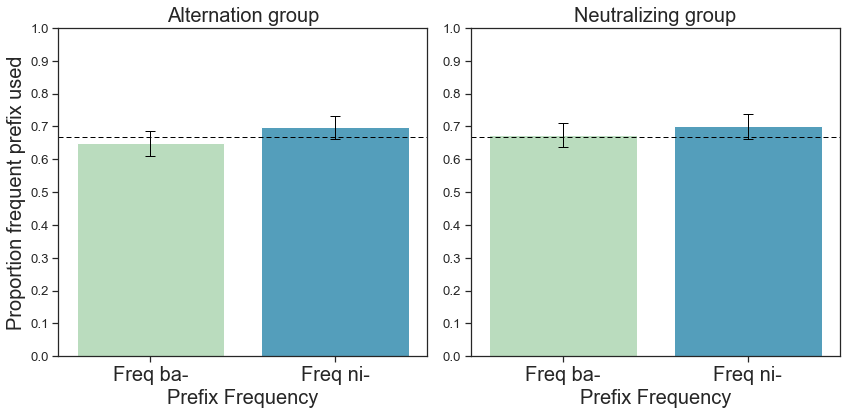

In [52]:
## Barplot for proportion frequent prefix by condition

#Calculate 95% CIs for error bars (normal approximation method for binomial proportions, on means)
def binom_CIs(p,n,z):
    ci = (z * np.sqrt( p*(1-p))/n )
    return ci

CIs = [
    binom_CIs(df[df.Group=='freqba_alt_nonneut_k'].UsedFreq.mean(),df[df.Group=='freqba_alt_nonneut_k'].Subject.nunique(),1.96),
    binom_CIs(df[df.Group=='freqni_alt_nonneut_k'].UsedFreq.mean(),df[df.Group=='freqni_alt_nonneut_k'].Subject.nunique(),1.96),
    binom_CIs(df[df.Group=='freqba_neut_k'].UsedFreq.mean(),df[df.Group=='freqba_neut_k'].Subject.nunique(),1.96),
    binom_CIs(df[df.Group=='freqni_neut_k'].UsedFreq.mean(),df[df.Group=='freqni_neut_k'].Subject.nunique(),1.96)
]

# Initialise figure subplots
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6))

# Set figure data

sns.barplot(x='Group',y='UsedFreq',
            data=df[(df.Neutralization=='no') & (df.Alternations=='yes')],
            order=['freqba_alt_nonneut_k','freqni_alt_nonneut_k'], 
            palette='GnBu', 
            ci=None, yerr=[CIs[0],CIs[1]], error_kw=dict(lw=1, capsize=5, capthick=1), 
            
            ax=ax[0])
sns.barplot(x='Group',y='UsedFreq',
            data=df[(df.Neutralization=='yes') & (df.Alternations=='yes')],
            order=['freqba_neut_k','freqni_neut_k'],
            palette='GnBu', 
            ci=None, yerr=[CIs[2],CIs[3]], error_kw=dict(lw=1, capsize=5, capthick=1), 
            ax=ax[1])

# Set figure parameters
sns.set_style( {'font.family':'serif', 'font.serif':'Times New Roman'})

ax[0].set_title('Alternation group', fontsize=20) 
ax[0].set_xlabel('Prefix Frequency', fontsize=20)
ax[0].set_ylabel('Proportion frequent prefix used',fontsize=20)
ax[0].set_xticklabels(['Freq ba-','Freq ni-'], fontsize =20)
ax[0].set_ylim([0,1])

ax[0].yaxis.set_major_locator(ticker.LinearLocator(11))

ax[1].set_title('Neutralizing group', fontsize=20)
ax[1].set_xlabel('Prefix Frequency',fontsize=20)
ax[1].set_ylabel('')
ax[1].set_xticklabels(['Freq ba-','Freq ni-'],fontsize=20)
ax[1].set_ylim([0,1])
         
ax[1].yaxis.set_major_locator(ticker.LinearLocator(11))


# Add input amount lines to plot

ax[0].axhline(0.667,color='black',linestyle='--', lw=1, dashes=(5,3))

ax[1].axhline(0.667,color='black',linestyle='--', lw=1, dashes=(5,3))


# Make the spacing nice
plt.tight_layout()

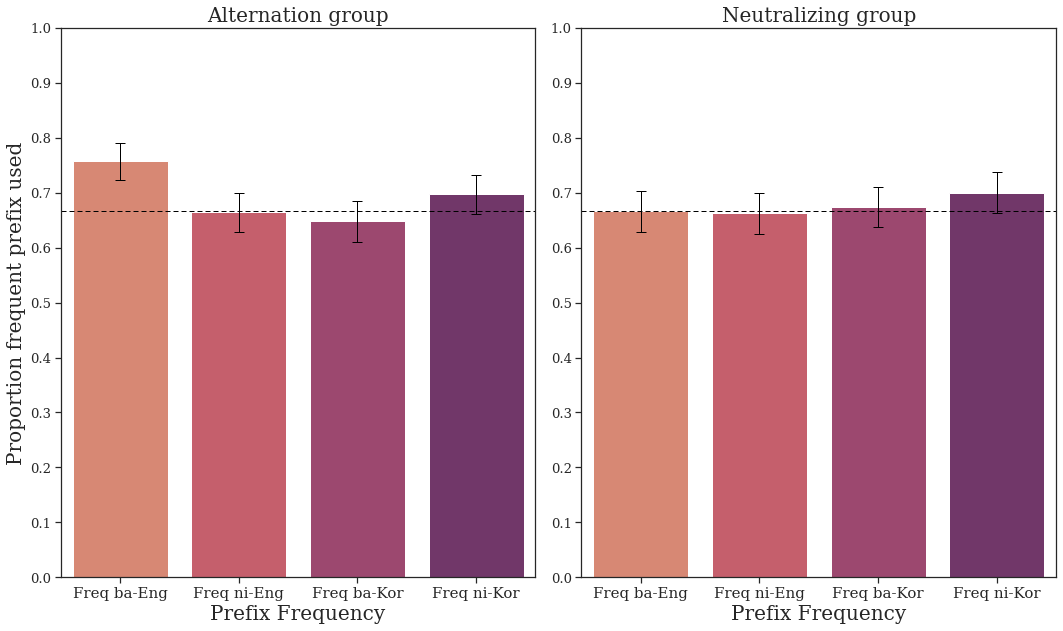

In [53]:
## Barplot for Korean 

#Calculate 95% CIs for error bars (normal approximation method for binomial proportions, on means)
def binom_CIs(p,n,z):
    ci = (z * np.sqrt( p*(1-p))/n )
    return ci

CIs = [
    
    binom_CIs(df[df.Group=='freqba_alt_nonneut'].UsedFreq.mean(),df[df.Group=='freqba_alt_nonneut'].Subject.nunique(),1.96),
    binom_CIs(df[df.Group=='freqni_alt_nonneut'].UsedFreq.mean(),df[df.Group=='freqni_alt_nonneut'].Subject.nunique(),1.96),
    binom_CIs(df[df.Group=='freqba_alt_nonneut_k'].UsedFreq.mean(),df[df.Group=='freqba_alt_nonneut_k'].Subject.nunique(),1.96),
    binom_CIs(df[df.Group=='freqni_alt_nonneut_k'].UsedFreq.mean(),df[df.Group=='freqni_alt_nonneut_k'].Subject.nunique(),1.96),
    binom_CIs(df[df.Group=='freqba_neut'].UsedFreq.mean(),df[df.Group=='freqba_neut'].Subject.nunique(),1.96),
    binom_CIs(df[df.Group=='freqni_neut'].UsedFreq.mean(),df[df.Group=='freqni_neut'].Subject.nunique(),1.96),
    binom_CIs(df[df.Group=='freqba_neut_k'].UsedFreq.mean(),df[df.Group=='freqba_neut_k'].Subject.nunique(),1.96),
    binom_CIs(df[df.Group=='freqni_neut_k'].UsedFreq.mean(),df[df.Group=='freqni_neut_k'].Subject.nunique(),1.96)
]

# Initialise figure subplots
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,9))

# Set figure data

sns.barplot(x='Group',y='UsedFreq',
            data=df[(df.Neutralization=='no') & (df.Alternations=='yes')],
            order=['freqba_alt_nonneut','freqni_alt_nonneut','freqba_alt_nonneut_k','freqni_alt_nonneut_k'], 
            palette='flare', 
            ci=None, yerr=[CIs[0],CIs[1],CIs[2],CIs[3]], error_kw=dict(lw=1, capsize=5, capthick=1), 
            ax=ax[0])
sns.barplot(x='Group',y='UsedFreq',
            data=df[(df.Neutralization=='yes') & (df.Alternations=='yes')],
            order=['freqba_neut','freqni_neut','freqba_neut_k','freqni_neut_k'],
            palette='flare', 
            ci=None, yerr=[CIs[4],CIs[5],CIs[6],CIs[7]], error_kw=dict(lw=1, capsize=5, capthick=1), 
            ax=ax[1])

# Set figure parameters
sns.set_style( {'font.family':'serif', 'font.serif':'Times New Roman'})

ax[0].set_title('Alternation group', fontsize=20)
ax[0].set_xlabel('Prefix Frequency',fontsize=20)
ax[0].set_ylabel('Proportion frequent prefix used',fontsize=20)
ax[0].set_xticklabels(['Freq ba-Eng','Freq ni-Eng','Freq ba-Kor','Freq ni-Kor'],fontsize=15)
ax[0].set_ylim([0,1])
         
ax[0].yaxis.set_major_locator(ticker.LinearLocator(11))

ax[1].set_title('Neutralizing group',fontsize=20)
ax[1].set_xlabel('Prefix Frequency',fontsize=20)
ax[1].set_ylabel(''),
ax[1].set_xticklabels(['Freq ba-Eng','Freq ni-Eng','Freq ba-Kor','Freq ni-Kor'],fontsize=15)
ax[1].set_ylim([0,1])
        
ax[1].yaxis.set_major_locator(ticker.LinearLocator(11))



# Add input amount lines to plot

ax[0].axhline(0.667,color='black',linestyle='--', lw=1, dashes=(5,3))

ax[1].axhline(0.667,color='black',linestyle='--', lw=1, dashes=(5,3))

'''
ax[0].axhline(0.5,0,0.33,color='black',linestyle='--', lw=1, dashes=(5,3))
ax[0].axhline(0.667,0.33,1,color='black',linestyle='--', lw=1, dashes=(5,3))
ax[1].axhline(0.5,0,0.33,color='black',linestyle='--', lw=1, dashes=(5,3))
ax[1].axhline(0.667,0.33,1,color='black',linestyle='--', lw=1, dashes=(5,3))
ax[2].axhline(0.5,0,0.33,color='black',linestyle='--', lw=1, dashes=(5,3))
ax[2].axhline(0.667,0.33,1,color='black',linestyle='--', lw=1, dashes=(5,3))
# Make the spacing nice
'''
plt.tight_layout()

### Statistics

In [141]:
## Print current dataframe to new csv to be opened with R 
with open('data_for_R.csv','w+') as f: df.to_csv(f, index=False)


In [ ]:
# Note: %%R at the beginning of the cell means that the cell is run with R instead of python.

In [142]:
%%R
setwd('/Users/HanByulSong/Desktop/publication python')
install.packages("lme4")
library(lme4)
#setwd('/Users/james.white/Dropbox/Advising/UCL/PhD/HanbyulSong/Experiment/June2020')

R[write to console]: Installing package into 'C:/Users/HanByulSong/Documents/R/win-library/3.5'
(as 'lib' is unspecified)



--- Please select a CRAN mirror for use in this session ---

  There is a binary version available but the source version is later:
     binary source needs_compilation
lme4 1.1-23 1.1-26              TRUE

Do you want to install from sources the package which needs compilation? (Yes/no/cancel) y


R[write to console]: installing the source package 'lme4'


R[write to console]: trying URL 'https://cran.ma.imperial.ac.uk/src/contrib/lme4_1.1-26.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 3297635 bytes (3.1 MB)

R[write to console]: downloaded 3.1 MB


R[write to console]: 

R[write to console]: 
R[write to console]: The downloaded source packages are in
	'C:\Users\HanByulSong\AppData\Local\Temp\RtmpCwT4YK\downloaded_packages'
R[write to console]: 
R[write to console]: 

R[write to console]: Loading required package: Matrix



In [143]:
%%R
# Read data into R and check dataframe
data = read.csv('./data_for_R.csv',header=TRUE)
head(data)

  Subject              Group Age Gender       Phase TrialNum KeyPress Accuracy
1      11 freqba_alt_nonneut  26      m affixedtest        2        f        1
2      11 freqba_alt_nonneut  26      m affixedtest        3        j        0
3      11 freqba_alt_nonneut  26      m affixedtest        4        f        1
4      11 freqba_alt_nonneut  26      m affixedtest        5        f        1
5      11 freqba_alt_nonneut  26      m affixedtest        6        f        0
6      11 freqba_alt_nonneut  26      m affixedtest        7        f        1
  CurrentScore   RT    Response AffixUsed StemAlternation AlienWord     Picture
1          215 5000  ba_correct        ba              no    bakuta     kitten2
2          220 7279 ni_nochange        ni              no    bagapi       fork2
3          230 3329  ba_correct        ba              no    baputi       bird2
4          240 5792  ba_correct        ba              no    bagaku      melon2
5          245 5699  ba_correct        ba      

In [144]:
%%R
# Check number of row to be sure all are accounted for (should match value from pandas above)
nrow(data)

[1] 17305


In [145]:
%%R
#Making a subset for Korean model
dataK=subset(data,(data$Language %in% c('Kor')))


head(dataK)


      Subject                Group Age Gender       Phase TrialNum KeyPress
11991     301 freqba_alt_nonneut_k  22      f affixedtest        1        j
11992     301 freqba_alt_nonneut_k  22      f affixedtest        3        f
11993     301 freqba_alt_nonneut_k  22      f affixedtest        4        f
11994     301 freqba_alt_nonneut_k  22      f affixedtest        6        f
11995     301 freqba_alt_nonneut_k  22      f affixedtest       10        f
11996     301 freqba_alt_nonneut_k  22      f affixedtest       13        f
      Accuracy CurrentScore   RT    Response AffixUsed StemAlternation
11991        0          215 3644 ni_nochange        ni              no
11992        1          225 3834  ba_correct        ba              no
11993        0          225 7121  ba_correct        ba              no
11994        0          230 6232  ba_correct        ba              no
11995        0          235 3876  ba_correct        ba              no
11996        1          245 5643  ba_corre

In [146]:
%%R
nrow(dataK)

[1] 5315


In [147]:
%%R
with(dataK, tapply(UsedFreq, list(Group), mean, na.r.=T))

     5050_alt_nonneut             5050_neut   5050_nonalt_nonneut 
                   NA                    NA                    NA 
   freqba_alt_nonneut  freqba_alt_nonneut_k           freqba_neut 
                   NA             0.6483180                    NA 
        freqba_neut_k freqba_nonalt_nonneut    freqni_alt_nonneut 
            0.6736311                    NA                    NA 
 freqni_alt_nonneut_k           freqni_neut         freqni_neut_k 
            0.6968044                    NA             0.6998503 
freqni_nonalt_nonneut 
                   NA 


In [148]:
%%R
data_no5050= subset(data, (data$Group != '5050_alt_nonneut' & data$Group != '5050_neut'& data$Group !='5050_nonalt_nonneut' ))
                    

In [149]:
%%R
##Make a subset that only includes Alternation condiiton of Eng and Kor data
dataA = subset(data_no5050, (data_no5050$Group %in% c('freqba_alt_nonneut_k', 'freqni_alt_nonneut_k' ,'freqba_alt_nonneut', 'freqni_alt_nonneut')))
nrow(dataA)



[1] 5266


In [150]:
%%R
with(dataA, tapply(UsedFreq, list(AltCondition,FreqCondition,Language), mean, na.r.=T))

, , Eng

               5050    freqba    freqni
alternation      NA 0.7569956 0.6643888
neutralization   NA        NA        NA
nonalternation   NA        NA        NA

, , Kor

               5050   freqba    freqni
alternation      NA 0.648318 0.6968044
neutralization   NA       NA        NA
nonalternation   NA       NA        NA



In [151]:
%%R
##Make a subset that only includes Neutralization condition of Eng and Kor data
dataN = subset(data_no5050, (data_no5050$Group %in% c('freqba_neut_k','freqni_neut_k','freqba_neut','freqni_neut')))
nrow(dataN)


[1] 5408


In [152]:
%%R
with(dataN, tapply(UsedFreq, list(AltCondition,FreqCondition,Language), mean, na.r.=T))

, , Eng

               5050    freqba    freqni
alternation      NA        NA        NA
neutralization   NA 0.6661808 0.6623476
nonalternation   NA        NA        NA

, , Kor

               5050    freqba    freqni
alternation      NA        NA        NA
neutralization   NA 0.6736311 0.6998503
nonalternation   NA        NA        NA



In [154]:
%%R
# FUll model  *****THIS MODEL ONLY INCLUDES KOREAN DATA****
# This model includes Freqba Freqni Alternation and Freqba Freqni Neutralization Korean data
# compare the Frequency of prefix form in output only in Alt and Neut of Korean data
lmer1 = glmer(UsedFreq ~ Neutralization*FreqCondition + (1|Subject) + (1|Picture), data=dataK, family=binomial)
summary(lmer1)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: UsedFreq ~ Neutralization * FreqCondition + (1 | Subject) + (1 |  
    Picture)
   Data: dataK

     AIC      BIC   logLik deviance df.resid 
  6462.2   6501.7  -3225.1   6450.2     5309 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2009 -1.1014  0.5345  0.7005  1.2366 

Random effects:
 Groups  Name        Variance Std.Dev.
 Subject (Intercept) 0.36055  0.6005  
 Picture (Intercept) 0.02229  0.1493  
Number of obs: 5315, groups:  Subject, 99; Picture, 10

Fixed effects:
                                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)                             0.6616     0.1427   4.636 3.55e-06 ***
Neutralizationyes                       0.1317     0.1902   0.692    0.489    
FreqConditionfreqni                     0.2794     0.1922   1.454    0.146    
Neutralizationyes:FreqConditionfreqni  -0.1541     0.2719

### Summary

The intercept was sig (positive). Korean participants used the freq prefix significantly often. They did not avoid using the neutralizing variant in Neutralizing condiiton.
The propertion of the frequent prefix in output is comparable across the conditions.
-There was no fixed-effects of Neutralization or Frequent prefix
-There was no interaction-effect of Neutralization * Frequent prefix either

##### Alternation Kor - Alternation Neut #####

In [155]:
%%R
head(dataA)

  Subject              Group Age Gender       Phase TrialNum KeyPress Accuracy
1      11 freqba_alt_nonneut  26      m affixedtest        2        f        1
2      11 freqba_alt_nonneut  26      m affixedtest        3        j        0
3      11 freqba_alt_nonneut  26      m affixedtest        4        f        1
4      11 freqba_alt_nonneut  26      m affixedtest        5        f        1
5      11 freqba_alt_nonneut  26      m affixedtest        6        f        0
6      11 freqba_alt_nonneut  26      m affixedtest        7        f        1
  CurrentScore   RT    Response AffixUsed StemAlternation AlienWord     Picture
1          215 5000  ba_correct        ba              no    bakuta     kitten2
2          220 7279 ni_nochange        ni              no    bagapi       fork2
3          230 3329  ba_correct        ba              no    baputi       bird2
4          240 5792  ba_correct        ba              no    bagaku      melon2
5          245 5699  ba_correct        ba      

In [156]:
%%R
##Compare Alternation condition in Korean data to English data
##This model includes Freq ba/ni Alternation English, Freq ba/ni Alternation Korean

lmer3 = glmer(UsedFreq ~ Language*FreqCondition+ (1|Subject) + (1|Picture), data=dataA, family=binomial)
summary(lmer3)
#removing the interaction significantly lower the accuary of model, so the interaction effects of Language*FreqCondition remain

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: UsedFreq ~ Language * FreqCondition + (1 | Subject) + (1 | Picture)
   Data: dataA

     AIC      BIC   logLik deviance df.resid 
  6274.7   6314.1  -3131.3   6262.7     5260 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2918 -1.0822  0.5196  0.6851  1.2398 

Random effects:
 Groups  Name        Variance Std.Dev.
 Subject (Intercept) 0.35598  0.5966  
 Picture (Intercept) 0.02761  0.1662  
Number of obs: 5266, groups:  Subject, 101; Picture, 10

Fixed effects:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                       1.2162     0.1467   8.292  < 2e-16 ***
LanguageKor                      -0.5543     0.1915  -2.895  0.00379 ** 
FreqConditionfreqni              -0.5175     0.1900  -2.724  0.00645 ** 
LanguageKor:FreqConditionfreqni   0.7955     0.2697   2.950  0.00318 ** 
---
Signif. codes: 

In [157]:
%%R
lmer4 = glmer(UsedFreq ~ Language+FreqCondition+(1|Subject)+(1|Picture), data=dataA, family=binomial)
summary(lmer4)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: UsedFreq ~ Language + FreqCondition + (1 | Subject) + (1 | Picture)
   Data: dataA

     AIC      BIC   logLik deviance df.resid 
  6281.1   6313.9  -3135.5   6271.1     5261 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2674 -1.0833  0.5220  0.6838  1.2705 

Random effects:
 Groups  Name        Variance Std.Dev.
 Subject (Intercept) 0.39447  0.6281  
 Picture (Intercept) 0.02764  0.1662  
Number of obs: 5266, groups:  Subject, 101; Picture, 10

Fixed effects:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)           1.0140     0.1333   7.604 2.87e-14 ***
LanguageKor          -0.1513     0.1403  -1.079    0.281    
FreqConditionfreqni  -0.1221     0.1403  -0.871    0.384    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr) LnggKr
LanguageKor -0.5

In [158]:
%%R
anova(lmer3, lmer4)

Data: dataA
Models:
lmer4: UsedFreq ~ Language + FreqCondition + (1 | Subject) + (1 | Picture)
lmer3: UsedFreq ~ Language * FreqCondition + (1 | Subject) + (1 | Picture)
      Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)   
lmer4  5 6281.1 6313.9 -3135.6   6271.1                            
lmer3  6 6274.7 6314.1 -3131.3   6262.7 8.4172      1   0.003717 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


### Summary

The Korean Participants used the frequent prefix form significantly less often in Freqba- Alternation compare to Englsih participants in Freqba-Alternation.
The interaction effect of Language* FreqCondition shows that the propertion of freqnt prefix in Korean Freqni-Alternation is sig higher than English Freqba-Alternation ( Should it be sig lower?)


#### Neutralization Korean - Neutralization English#### 

In [159]:
%%R
##Compare Neutralization condition in Korean data to English data
## MOdel 1
lmer6=glmer(UsedFreq~ Language*FreqCondition+(1|Subject)+(1|Picture), data= dataN, family=binomial)
summary(lmer6)
#The interaction-effect of Language*\freqCondition does not increase the model fit, so it can be removed

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: UsedFreq ~ Language * FreqCondition + (1 | Subject) + (1 | Picture)
   Data: dataN

     AIC      BIC   logLik deviance df.resid 
  6686.0   6725.5  -3337.0   6674.0     5402 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.4634 -1.1710  0.5701  0.7170  1.3544 

Random effects:
 Groups  Name        Variance Std.Dev.
 Subject (Intercept) 0.248899 0.49890 
 Picture (Intercept) 0.009264 0.09625 
Number of obs: 5408, groups:  Subject, 99; Picture, 10

Fixed effects:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                      0.73921    0.12036   6.142 8.16e-10 ***
LanguageKor                      0.04163    0.16450   0.253    0.800    
FreqConditionfreqni             -0.04132    0.16456  -0.251    0.802    
LanguageKor:FreqConditionfreqni  0.16476    0.23413   0.704    0.482    
---
Signif. codes:  

In [160]:
%%R
#this will be the best model
lmer7=glmer(UsedFreq~ Language+FreqCondition+(1|Subject)+(1|Picture), data= dataN, family=binomial)
summary(lmer7)
## A fixed effect of FreqCondition did not sig improve the model fit

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: UsedFreq ~ Language + FreqCondition + (1 | Subject) + (1 | Picture)
   Data: dataN

     AIC      BIC   logLik deviance df.resid 
  6684.5   6717.4  -3337.2   6674.5     5403 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.4477 -1.1709  0.5665  0.7193  1.3625 

Random effects:
 Groups  Name        Variance Std.Dev.
 Subject (Intercept) 0.250365 0.50036 
 Picture (Intercept) 0.009281 0.09634 
Number of obs: 5408, groups:  Subject, 99; Picture, 10

Fixed effects:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)           0.6987     0.1057   6.609 3.88e-11 ***
LanguageKor           0.1230     0.1173   1.049    0.294    
FreqConditionfreqni   0.0400     0.1173   0.341    0.733    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr) LnggKr
LanguageKor -0.55

In [161]:
%%R
anova(lmer6,lmer7)

Data: dataN
Models:
lmer7: UsedFreq ~ Language + FreqCondition + (1 | Subject) + (1 | Picture)
lmer6: UsedFreq ~ Language * FreqCondition + (1 | Subject) + (1 | Picture)
      Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
lmer7  5 6684.5 6717.4 -3337.2   6674.5                         
lmer6  6 6686.0 6725.5 -3337.0   6674.0 0.4939      1     0.4822


In [165]:
%%R
lmer8=glmer(UsedFreq~ Language+(1|Subject)+(1|Picture), data= dataN, family=binomial)
summary(lmer8)
#A fixed-effect of Language did not sig improve the model fit

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: UsedFreq ~ Language + (1 | Subject) + (1 | Picture)
   Data: dataN

     AIC      BIC   logLik deviance df.resid 
  6682.6   6708.9  -3337.3   6674.6     5404 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.4581 -1.1702  0.5658  0.7197  1.3597 

Random effects:
 Groups  Name        Variance Std.Dev.
 Subject (Intercept) 0.251017 0.50102 
 Picture (Intercept) 0.009287 0.09637 
Number of obs: 5408, groups:  Subject, 99; Picture, 10

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.71871    0.08806   8.161 3.32e-16 ***
LanguageKor  0.12261    0.11742   1.044    0.296    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
LanguageKor -0.658


In [167]:
%%R
anova(lmer7, lmer8)

Data: dataN
Models:
lmer7: UsedFreq ~ Language + (1 | Subject) + (1 | Picture)
lmer8: UsedFreq ~ Language + (1 | Subject) + (1 | Picture)
      Df    AIC    BIC  logLik deviance Chisq Chi Df Pr(>Chisq)
lmer7  4 6682.6 6708.9 -3337.3   6674.6                        
lmer8  4 6682.6 6708.9 -3337.3   6674.6     0      0          1


In [168]:
%%R
lmer9=glmer(UsedFreq~ (1|Subject)+(1|Picture), data= dataN, family=binomial)
summary(lmer9)
###This would be the best model

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: UsedFreq ~ (1 | Subject) + (1 | Picture)
   Data: dataN

     AIC      BIC   logLik deviance df.resid 
  6681.7   6701.4  -3337.8   6675.7     5405 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.4923 -1.1673  0.5677  0.7197  1.3525 

Random effects:
 Groups  Name        Variance Std.Dev.
 Subject (Intercept) 0.254498 0.5045  
 Picture (Intercept) 0.009313 0.0965  
Number of obs: 5408, groups:  Subject, 99; Picture, 10

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.77965    0.06658   11.71   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [171]:
%%R
anova(lmer8, lmer9)

Data: dataN
Models:
lmer9: UsedFreq ~ (1 | Subject) + (1 | Picture)
lmer8: UsedFreq ~ Language + (1 | Subject) + (1 | Picture)
      Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
lmer9  3 6681.7 6701.4 -3337.8   6675.7                         
lmer8  4 6682.6 6708.9 -3337.3   6674.6 1.0849      1     0.2976


### Summary

In Neutralization condition, the proportion of the frequent prefix in output was comparable in all Prefix Frequency conditions and Langauge of participants.

## Number of subjects who regularized

In [172]:
from scipy.stats import binom_test

In [173]:
regularisers = pd.concat(
    [pd.DataFrame(
        (df[df.FreqCondition=='5050'].groupby(['Subject','Group']).mean())),
    pd.DataFrame(
        (df[df.FreqCondition!='5050'].groupby(['Subject','Group']).mean()))]
)

print(regularisers.groupby(['Subject','Group']).nunique())
        

                            Age  TrialNum  Accuracy  CurrentScore  total  \
Subject Group                                                              
11.0    freqba_alt_nonneut    1         1         1             1      1   
12.0    freqba_alt_nonneut    1         1         1             1      1   
13.0    freqba_alt_nonneut    1         1         1             1      1   
14.0    freqba_alt_nonneut    1         1         1             1      1   
15.0    freqba_alt_nonneut    1         1         1             1      1   
...                         ...       ...       ...           ...    ...   
402.0   freqni_neut_k         1         1         1             1      1   
403.0   freqni_neut_k         1         1         1             1      1   
404.0   freqni_neut_k         1         1         1             1      1   
405.0   freqni_neut_k         1         1         1             1      1   
406.0   freqni_neut_k         1         1         1             1      1   

           

In [189]:
## Number of subjects who individually used the frequent affix more than the input proportion
regularisers = pd.concat(
    [pd.DataFrame(
        (df[df.FreqCondition=='5050'].groupby(['Subject','Group']).mean()['UsedFreq']>.5).groupby('Group').sum().astype(int)),
    pd.DataFrame(
        (df[df.FreqCondition!='5050'].groupby(['Subject','Group']).mean()['UsedFreq']>.6667).groupby('Group').sum().astype(int))
    ]  
)

regularisers = pd.concat([regularisers,
                          pd.DataFrame(df.groupby('Group')['Subject'].nunique())],axis=1)

regularisers.columns = ['Number of regularisers','Total subjects']

regularisers['Proportion regularisers'] = round(regularisers['Number of regularisers']/regularisers['Total subjects'],2)

binomtest_pvalues = []

for i in range(len(regularisers)):
    p = binom_test(regularisers.iloc[i]['Number of regularisers'],regularisers.iloc[i]['Total subjects'])
    binomtest_pvalues.append(p)

regularisers['Binomial test p-value'] = binomtest_pvalues

regularisers



,Number of regularisers,Total subjects,Proportion regularisers,Binomial test p-value
Group,,,,
5050_alt_nonneut,12,24,0.50,1.000000
5050_neut,9,25,0.36,0.229523
5050_nonalt_nonneut,12,25,0.48,1.000000
freqba_alt_nonneut,21,25,0.84,0.000911
freqba_alt_nonneut_k,10,25,0.40,0.424356
freqba_neut,10,25,0.40,0.424356
freqba_neut_k,12,25,0.48,1.000000
freqba_nonalt_nonneut,7,26,0.27,0.028959
freqni_alt_nonneut,12,26,0.46,0.845019


In [203]:
regularisers.iloc[5]['Number of regularisers']

10.0

In [198]:
regularisers['Number of regularisers']

Group
5050_alt_nonneut         12
5050_neut                 9
5050_nonalt_nonneut      12
freqba_alt_nonneut       21
freqba_alt_nonneut_k     10
freqba_neut              10
freqba_neut_k            12
freqba_nonalt_nonneut     7
freqni_alt_nonneut       12
freqni_alt_nonneut_k     13
freqni_neut              11
freqni_neut_k            14
freqni_nonalt_nonneut    11
Name: Number of regularisers, dtype: int32

## Application of palatalization rule

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

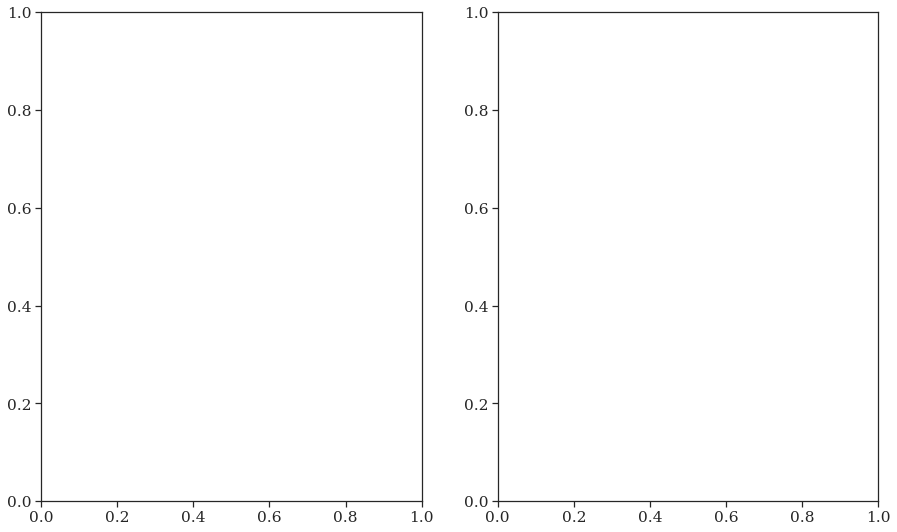

In [211]:
## Barplot for the number of people who regularize the response
# Subject for velar-initial only
regularisers


fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,9))

# Set global parameters
width=0.4

# Set figure data

ax[0].bar(x=[1-width,1,2-width,2,3-width,3],
          height=regularisers[(regularisers.iloc[4]['Number of regularisers']) & (regularisers.iloc[9]['Number of regularisers']) & (regularisers.iloc[6]['Number of regularisers']) & regularisers.iloc[11]['Number of regularisers']],
          color=['black','grey','blue','orange']
          #yerr=[12, 7, 11]
         )
ax[1].bar(x=[1-width,1,2-width,2,3-width,3],
          height=regularisers[((regularisers.iloc[3]['Number of regularisers']) & (regularisers.iloc[8]['Number of regularisers'])& (regularisers.iloc[5]['Number of regularisers']) & (regularisers.iloc[10]['Number of regularisers']))],
          color=['black','grey','blue','orange']
          #yerr=[12,21,12 ]
         )



# Set figure parameters
ax[0].set(title='Regularized responses \n (Korean participants)' ,
          xlabel='Frequency condition',
          ylabel='Number of participants who regularized the output',
          xticks= [1,2,3,4],
          xticklabels=['Alt Freqba','Alt Freqni','Neu Freqba', 'Neu Freqni'],
          xlim=[0.5,3.5],
          ylim=[0,1]
         )
ax[0].yaxis.set_major_locator(ticker.LinearLocator(11))

ax[1].set(title='Regularized responses \n (English participants)',
          xlabel='Frequency condition',
          ylabel='',
          xticks= [1,2,3,4],
          xticklabels=['Alt Freqba','Alt Freqni','Neu Freqba', 'Neu Freqni'],
          xlim=[0.5,3.5],
          ylim=[0,1]
         )
ax[1].yaxis.set_major_locator(ticker.LinearLocator(11))

'''        
# Legend 
plt.legend(handles=[mpatches.Patch(color='darkmagenta', label='50-50)'),
            mpatches.Patch(color='violet', label='Alternation'),
            mpatches.Patch(color='thistle', label='Neutralizing')],
           title='Group',
           frameon=False,
           loc='upper left', bbox_to_anchor=(1, 1)
          )
'''  
# Make the spacing nice
plt.tight_layout()

In [212]:
## Proportion of trials in which participants alternated the stem, by condition and prefix
# Velar-initial stems only
# Non-alt condition excluded (as there was no rule application in training)  0518103824
df[(df.Alternations=='yes') & ((df.InitialStemC=='k') | (df.InitialStemC =='g'))].groupby(['Group','AffixUsed'])['AlternatedStem'].mean()
# which has the same result as following:
#df[(df.Alternations=='yes') & (df.InitialStemC.isin(['k','g']))].groupby(['Group','AffixUsed'])['AlternatedStem'].mean()

Group                 AffixUsed
5050_alt_nonneut      ba           0.037344
                      ni           0.740741
5050_neut             ba           0.082397
                      ni           0.586207
freqba_alt_nonneut    ba           0.022005
                      ni           0.737226
freqba_alt_nonneut_k  ba           0.021978
                      ni           0.387097
freqba_neut           ba           0.039578
                      ni           0.454545
freqba_neut_k         ba           0.046512
                      ni           0.527607
freqni_alt_nonneut    ba           0.110465
                      ni           0.713881
freqni_alt_nonneut_k  ba           0.174825
                      ni           0.647541
freqni_neut           ba           0.245000
                      ni           0.620130
freqni_neut_k         ba           0.109756
                      ni           0.641243
Name: AlternatedStem, dtype: float64

### Barplots

In [214]:
import matplotlib.patches as mpatches

In [215]:
df.head()

,Subject,Group,Age,Gender,Phase,TrialNum,KeyPress,Accuracy,CurrentScore,RT,...,UsedNi,FreqCondition,AltCondition,Alternations,Neutralization,InitialStemC,FreqPrefix,UsedFreq,Language,AlternatedStem
3,11.0,freqba_alt_nonneut,26.0,m,affixedtest,2.0,f,1.0,215.0,5000,...,0,freqba,alternation,yes,no,k,ba,1,Eng,0
5,11.0,freqba_alt_nonneut,26.0,m,affixedtest,3.0,j,0.0,220.0,7279,...,1,freqba,alternation,yes,no,g,ba,0,Eng,0
7,11.0,freqba_alt_nonneut,26.0,m,affixedtest,4.0,f,1.0,230.0,3329,...,0,freqba,alternation,yes,no,p,ba,1,Eng,0
9,11.0,freqba_alt_nonneut,26.0,m,affixedtest,5.0,f,1.0,240.0,5792,...,0,freqba,alternation,yes,no,g,ba,1,Eng,0
11,11.0,freqba_alt_nonneut,26.0,m,affixedtest,6.0,f,0.0,245.0,5699,...,0,freqba,alternation,yes,no,n,ba,1,Eng,0


In [216]:
velars = df[df.InitialStemC.isin(['k','g'])]

### First separated by group

In [217]:
velars.head()


,Subject,Group,Age,Gender,Phase,TrialNum,KeyPress,Accuracy,CurrentScore,RT,...,UsedNi,FreqCondition,AltCondition,Alternations,Neutralization,InitialStemC,FreqPrefix,UsedFreq,Language,AlternatedStem
3,11.0,freqba_alt_nonneut,26.0,m,affixedtest,2.0,f,1.0,215.0,5000,...,0,freqba,alternation,yes,no,k,ba,1,Eng,0
5,11.0,freqba_alt_nonneut,26.0,m,affixedtest,3.0,j,0.0,220.0,7279,...,1,freqba,alternation,yes,no,g,ba,0,Eng,0
9,11.0,freqba_alt_nonneut,26.0,m,affixedtest,5.0,f,1.0,240.0,5792,...,0,freqba,alternation,yes,no,g,ba,1,Eng,0
19,11.0,freqba_alt_nonneut,26.0,m,affixedtest,10.0,f,1.0,270.0,8531,...,0,freqba,alternation,yes,no,k,ba,1,Eng,0
29,11.0,freqba_alt_nonneut,26.0,m,affixedtest,15.0,f,1.0,305.0,7519,...,0,freqba,alternation,yes,no,k,ba,1,Eng,0


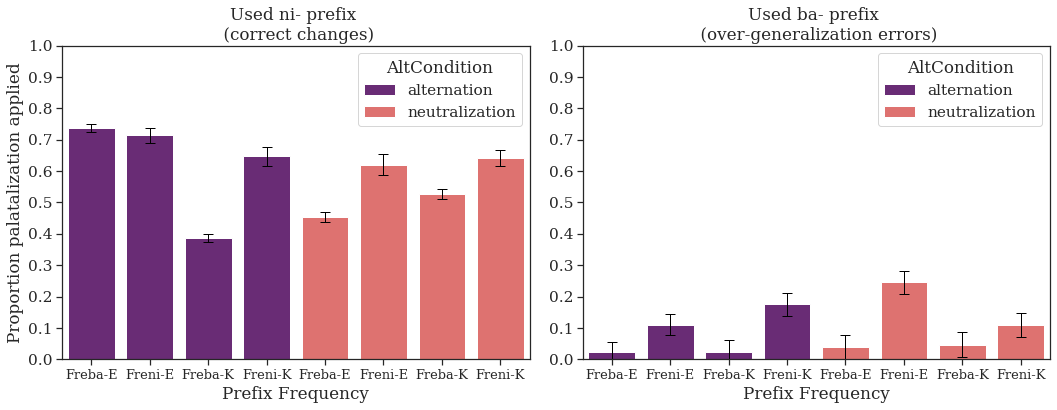

In [218]:
## Barplot for Korean 
velars = df[df.InitialStemC.isin(['k','g'])]
#Calculate 95% CIs for error bars (normal approximation method for binomial proportions, on means)
def binom_CIs(p,n,z):
    ci = (z * np.sqrt( p*(1-p))/n )
    return ci

CIs = [
    
    binom_CIs(velars[(velars.Group=='freqba_alt_nonneut') & (velars.AffixUsed=='ba')].AlternatedStem.mean(),velars[velars.Group=='freqba_alt_nonneut'].Subject.nunique(),1.96),
    binom_CIs(velars[(velars.Group=='freqba_alt_nonneut') & (velars.AffixUsed=='ni')].AlternatedStem.mean(),velars[velars.Group=='freqba_alt_nonneut'].Subject.nunique(),1.96),
    binom_CIs(velars[(velars.Group=='freqni_alt_nonneut') & (velars.AffixUsed=='ba')].AlternatedStem.mean(),velars[velars.Group=='freqni_alt_nonneut'].Subject.nunique(),1.96),
    binom_CIs(velars[(velars.Group=='freqni_alt_nonneut') & (velars.AffixUsed=='ni')].AlternatedStem.mean(),velars[velars.Group=='freqni_alt_nonneut'].Subject.nunique(),1.96),
    binom_CIs(velars[(velars.Group=='freqba_alt_nonneut_k') & (velars.AffixUsed=='ba')].AlternatedStem.mean(),velars[velars.Group=='freqba_alt_nonneut_k'].Subject.nunique(),1.96),
    binom_CIs(velars[(velars.Group=='freqba_alt_nonneut_k') & (velars.AffixUsed=='ni')].AlternatedStem.mean(),velars[velars.Group=='freqba_alt_nonneut_k'].Subject.nunique(),1.96),
    binom_CIs(velars[(velars.Group=='freqni_alt_nonneut_k') & (velars.AffixUsed=='ba')].AlternatedStem.mean(),velars[velars.Group=='freqni_alt_nonneut_k'].Subject.nunique(),1.96),
    binom_CIs(velars[(velars.Group=='freqni_alt_nonneut_k') & (velars.AffixUsed=='ni')].AlternatedStem.mean(),velars[velars.Group=='freqni_alt_nonneut_k'].Subject.nunique(),1.96),
    binom_CIs(velars[(velars.Group=='freqba_neut') & (velars.AffixUsed=='ba')].AlternatedStem.mean(),velars[velars.Group=='freqba_neut'].Subject.nunique(),1.96),
    binom_CIs(velars[(velars.Group=='freqba_neut') & (velars.AffixUsed=='ni')].AlternatedStem.mean(),velars[velars.Group=='freqba_neut'].Subject.nunique(),1.96),
    binom_CIs(velars[(velars.Group=='freqni_neut') & (velars.AffixUsed=='ba')].AlternatedStem.mean(),velars[velars.Group=='freqni_neut'].Subject.nunique(),1.96),
    binom_CIs(velars[(velars.Group=='freqni_neut') & (velars.AffixUsed=='ni')].AlternatedStem.mean(),velars[velars.Group=='freqni_neut'].Subject.nunique(),1.96),
    binom_CIs(velars[(velars.Group=='freqba_neut_k') & (velars.AffixUsed=='ba')].AlternatedStem.mean(),velars[velars.Group=='freqba_neut_k'].Subject.nunique(),1.96),
    binom_CIs(velars[(velars.Group=='freqba_neut_k') & (velars.AffixUsed=='ni')].AlternatedStem.mean(),velars[velars.Group=='freqba_neut_k'].Subject.nunique(),1.96),    
    binom_CIs(velars[(velars.Group=='freqni_neut_k') & (velars.AffixUsed=='ba')].AlternatedStem.mean(),velars[velars.Group=='freqni_neut_k'].Subject.nunique(),1.96),
    binom_CIs(velars[(velars.Group=='freqni_neut_k') & (velars.AffixUsed=='ni')].AlternatedStem.mean(),velars[velars.Group=='freqni_neut_k'].Subject.nunique(),1.96)
]

# Initialise figure subplots
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,6))

# Set figure data

sns.barplot(
            data=velars[(velars.AltCondition!='nonalternation') & (velars.FreqCondition !='5050') & (velars.AffixUsed =='ni')],
            x='Group',y='AlternatedStem',
            order=['freqba_alt_nonneut','freqni_alt_nonneut','freqba_alt_nonneut_k','freqni_alt_nonneut_k','freqba_neut','freqni_neut','freqba_neut_k','freqni_neut_k'], 
            palette="magma", 
            hue = 'AltCondition',
            dodge=False,
            ci=None, yerr=[CIs[0],CIs[2],CIs[4],CIs[6],CIs[8],CIs[10],CIs[12],CIs[14]], error_kw=dict(lw=1, capsize=5, capthick=1),
            ax=ax[0]
            )


sns.barplot(
            data=velars[(velars.AltCondition!='nonalternation') & (velars.FreqCondition !='5050') & (velars.AffixUsed =='ba')],
            x='Group',y='AlternatedStem',
            order=['freqba_alt_nonneut','freqni_alt_nonneut','freqba_alt_nonneut_k','freqni_alt_nonneut_k','freqba_neut','freqni_neut','freqba_neut_k','freqni_neut_k'], 
            hue = 'AltCondition',
            palette="magma", 
            dodge=False,
            ci=None, yerr=[CIs[1],CIs[3],CIs[5],CIs[7],CIs[9],CIs[11],CIs[13],CIs[15]], error_kw=dict(lw=1, capsize=5, capthick=1),
            ax=ax[1]
)


sns.set_style( {'font.family':'serif', 'font.serif':'Times New Roman'})
# Set figure parameters


ax[0].set(title='Used ni- prefix \n (correct changes)', 
      xlabel='Prefix Frequency',
      ylabel='Proportion palatalization applied',
      ylim=[0,1] 
    )
    
ax[0].set_xticklabels(['Freba-E','Freni-E','Freba-K','Freni-K','Freba-E','Freni-E','Freba-K','Freni-K'], fontsize=13)       


ax[0].yaxis.set_major_locator(ticker.LinearLocator(11))


ax[1].set(title='Used ba- prefix \n (over-generalization errors)',
          xlabel='Prefix Frequency',
          ylabel='',
          ylim=[0,1],
          )
    
ax[1].set_xticklabels(['Freba-E','Freni-E','Freba-K','Freni-K','Freba-E','Freni-E','Freba-K','Freni-K'], fontsize=13)         
    
ax[1].yaxis.set_major_locator(ticker.LinearLocator(11))


plt.tight_layout()




### Separated by ba- vs. ni- instead

### Statistics

In [220]:
## Print current dataframe to new csv to be opened with R 
with open('data_for_R.csv','w+') as f: df.to_csv(f, index=False)

PermissionError: [Errno 13] Permission denied: 'data_for_R.csv'

In [221]:
%%R
# Open libraries in R and set working directory
library(lme4)
setwd('/Users/HanByulSong/Desktop/publication python')
#setwd('/Users/james.white/Dropbox/Advising/UCL/PhD/HanbyulSong/Experiment/June2020')

In [222]:
%%R
# Read data into R and check dataframe
data = read.csv('./data_for_R.csv',header=TRUE)
head(data)

  Subject              Group Age Gender       Phase TrialNum KeyPress Accuracy
1      11 freqba_alt_nonneut  26      m affixedtest        2        f        1
2      11 freqba_alt_nonneut  26      m affixedtest        3        j        0
3      11 freqba_alt_nonneut  26      m affixedtest        4        f        1
4      11 freqba_alt_nonneut  26      m affixedtest        5        f        1
5      11 freqba_alt_nonneut  26      m affixedtest        6        f        0
6      11 freqba_alt_nonneut  26      m affixedtest        7        f        1
  CurrentScore   RT    Response AffixUsed StemAlternation AlienWord     Picture
1          215 5000  ba_correct        ba              no    bakuta     kitten2
2          220 7279 ni_nochange        ni              no    bagapi       fork2
3          230 3329  ba_correct        ba              no    baputi       bird2
4          240 5792  ba_correct        ba              no    bagaku      melon2
5          245 5699  ba_correct        ba      

In [223]:
%%R
dataK=subset(data,(data$Language %in% c('Kor')))


nrow(dataK)

[1] 5315


In [224]:
%%R
# Make subset of just velar-initial
velars = subset(data,data$InitialStemC %in% c('k','g'))

#Make subset of velars that excludes non-alternation groups
paldata = subset(velars,velars$AltCondition!='nonalternation')

#Make separate subsets of paldata for ba and ni used
baall = subset(paldata,paldata$AffixUsed=='ba')
niall = subset(paldata,paldata$AffixUsed=='ni')

In [225]:
%%R
with(data, tapply(AlternatedStem, list(Group), mean, na.r = T))

     5050_alt_nonneut             5050_neut   5050_nonalt_nonneut 
           0.15372168            0.13407407            0.00000000 
   freqba_alt_nonneut  freqba_alt_nonneut_k           freqba_neut 
           0.08173785            0.05198777            0.06559767 
        freqba_neut_k freqba_nonalt_nonneut    freqni_alt_nonneut 
           0.07492795            0.00000000            0.20728929 
 freqni_alt_nonneut_k           freqni_neut         freqni_neut_k 
           0.20498831            0.18521341            0.18413174 
freqni_nonalt_nonneut 
           0.00000000 


In [226]:
%%R
with(baall, tapply(AlternatedStem, list(Group), mean, na.r=T))

     5050_alt_nonneut             5050_neut   5050_nonalt_nonneut 
           0.03734440            0.08239700                    NA 
   freqba_alt_nonneut  freqba_alt_nonneut_k           freqba_neut 
           0.02200489            0.02197802            0.03957784 
        freqba_neut_k freqba_nonalt_nonneut    freqni_alt_nonneut 
           0.04651163                    NA            0.11046512 
 freqni_alt_nonneut_k           freqni_neut         freqni_neut_k 
           0.17482517            0.24500000            0.10975610 
freqni_nonalt_nonneut 
                   NA 


In [227]:
%%R
with(niall, tapply(AlternatedStem, list(Group), mean, na.r=T))

     5050_alt_nonneut             5050_neut   5050_nonalt_nonneut 
            0.7407407             0.5862069                    NA 
   freqba_alt_nonneut  freqba_alt_nonneut_k           freqba_neut 
            0.7372263             0.3870968             0.4545455 
        freqba_neut_k freqba_nonalt_nonneut    freqni_alt_nonneut 
            0.5276074                    NA             0.7138810 
 freqni_alt_nonneut_k           freqni_neut         freqni_neut_k 
            0.6475410             0.6201299             0.6412429 
freqni_nonalt_nonneut 
                   NA 


In [228]:
%%R
#Make subset of just velar-initial in Korean
velarsK = subset(dataK, dataK$InitialStemC %in% c('k','g'))
#Make separate subsets of palatalization for ba and ni used
ba = subset(velarsK, velarsK$AffixUsed == 'ba')
ni= subset(velarsK, velarsK$AffixUsed == 'ni')

In [229]:
%%R
with(ba, tapply(AlternatedStem, list(Group), mean, na.r.=T))

     5050_alt_nonneut             5050_neut   5050_nonalt_nonneut 
                   NA                    NA                    NA 
   freqba_alt_nonneut  freqba_alt_nonneut_k           freqba_neut 
                   NA            0.02197802                    NA 
        freqba_neut_k freqba_nonalt_nonneut    freqni_alt_nonneut 
           0.04651163                    NA                    NA 
 freqni_alt_nonneut_k           freqni_neut         freqni_neut_k 
           0.17482517                    NA            0.10975610 
freqni_nonalt_nonneut 
                   NA 


In [230]:
%%R
with(ni, tapply(AlternatedStem, list(Group), mean, na.r.=T))

     5050_alt_nonneut             5050_neut   5050_nonalt_nonneut 
                   NA                    NA                    NA 
   freqba_alt_nonneut  freqba_alt_nonneut_k           freqba_neut 
                   NA             0.3870968                    NA 
        freqba_neut_k freqba_nonalt_nonneut    freqni_alt_nonneut 
            0.5276074                    NA                    NA 
 freqni_alt_nonneut_k           freqni_neut         freqni_neut_k 
            0.6475410                    NA             0.6412429 
freqni_nonalt_nonneut 
                   NA 


### when ni- was used (correct application)

In [232]:
%%R
## Full model ***THIS MODEL ONLY INCLUDES KOREAN DATA****
#This model includes Freq ba, Freqni of Alt and Neut Korean data
# This model includes Neutralization, FreqCondition, and the interaction
lmer1ni = glmer(AlternatedStem ~ Neutralization*FreqCondition + (1|Subject) + (1|Picture), data=ni, family=binomial)
summary(lmer1ni)


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: AlternatedStem ~ Neutralization * FreqCondition + (1 | Subject) +  
    (1 | Picture)
   Data: ni

     AIC      BIC   logLik deviance df.resid 
  1177.2   1206.9   -582.6   1165.2     1032 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.3297 -0.6413  0.2472  0.6079  2.3559 

Random effects:
 Groups  Name        Variance Std.Dev.
 Subject (Intercept) 2.5342   1.5919  
 Picture (Intercept) 0.1096   0.3311  
Number of obs: 1038, groups:  Subject, 98; Picture, 4

Fixed effects:
                                      Estimate Std. Error z value Pr(>|z|)   
(Intercept)                            -0.7946     0.4335  -1.833  0.06683 . 
Neutralizationyes                       0.8684     0.5522   1.573  0.11583   
FreqConditionfreqni                     1.5861     0.5342   2.969  0.00299 **
Neutralizationyes:FreqConditionfreqni  -0.7169     0.7450  

In [234]:
%%R
# Remove the interaction
lmer2ni = glmer(AlternatedStem ~ Neutralization+FreqCondition + (1|Subject) + (1|Picture), data=ni, family=binomial)
summary(lmer2ni)
##FreqCOndition significantly increased the model fit. This is the final model

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: AlternatedStem ~ Neutralization + FreqCondition + (1 | Subject) +  
    (1 | Picture)
   Data: ni

     AIC      BIC   logLik deviance df.resid 
  1176.2   1200.9   -583.1   1166.2     1033 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.4115 -0.6404  0.2458  0.6127  2.3974 

Random effects:
 Groups  Name        Variance Std.Dev.
 Subject (Intercept) 2.5656   1.6017  
 Picture (Intercept) 0.1094   0.3308  
Number of obs: 1038, groups:  Subject, 98; Picture, 4

Fixed effects:
                    Estimate Std. Error z value Pr(>|z|)   
(Intercept)          -0.5890     0.3778  -1.559  0.11901   
Neutralizationyes     0.4762     0.3734   1.275  0.20215   
FreqConditionfreqni   1.2227     0.3766   3.247  0.00117 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr) Ntrlzt
Neutrlz

In [235]:
%%R
# Compare lmer1ni and lmer2ni with likelihood ratio test
anova(lmer1ni, lmer2ni)

# Interaction is not sig., and so should be removed.

Data: ni
Models:
lmer2ni: AlternatedStem ~ Neutralization + FreqCondition + (1 | Subject) + 
lmer2ni:     (1 | Picture)
lmer1ni: AlternatedStem ~ Neutralization * FreqCondition + (1 | Subject) + 
lmer1ni:     (1 | Picture)
        Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
lmer2ni  5 1176.2 1200.9 -583.08   1166.2                         
lmer1ni  6 1177.2 1206.9 -582.62   1165.2 0.9127      1     0.3394


In [236]:
%%R
# Remove FreqCondition
lmer3ni = glmer(AlternatedStem ~ Neutralization + (1|Subject) + (1|Picture), data=ni, family=binomial)
summary(lmer3ni)


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: AlternatedStem ~ Neutralization + (1 | Subject) + (1 | Picture)
   Data: ni

     AIC      BIC   logLik deviance df.resid 
  1184.3   1204.1   -588.2   1176.3     1034 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2312 -0.6361  0.2537  0.6107  2.5878 

Random effects:
 Groups  Name        Variance Std.Dev.
 Subject (Intercept) 2.9391   1.7144  
 Picture (Intercept) 0.1049   0.3238  
Number of obs: 1038, groups:  Subject, 98; Picture, 4

Fixed effects:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)        0.09832    0.32292   0.304    0.761
Neutralizationyes  0.44886    0.39359   1.140    0.254

Correlation of Fixed Effects:
            (Intr)
Neutrlztnys -0.615


In [237]:
%%R
# Compare lmer2ni and lmer3ni with likelihood ratio test
anova(lmer2ni, lmer3ni)

##

Data: ni
Models:
lmer3ni: AlternatedStem ~ Neutralization + (1 | Subject) + (1 | Picture)
lmer2ni: AlternatedStem ~ Neutralization + FreqCondition + (1 | Subject) + 
lmer2ni:     (1 | Picture)
        Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)   
lmer3ni  4 1184.3 1204.1 -588.17   1176.3                            
lmer2ni  5 1176.2 1200.9 -583.08   1166.2 10.175      1   0.001423 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


### Summary

Korean participants palatalized stems when using ni- only in Alternation frequent ni- condition.
No other effects were significant.

### when ba- was used (over-generalization errors)

In [238]:
%%R
## Full model
# This model includes Neutralization, FreqCondition, and the interaction
lmer1ba = glmer(AlternatedStem ~ Neutralization*FreqCondition + (1|Subject), data=ba, family=binomial)
summary(lmer1ba)

#Note: the model does not converge with the random item intercepts, so these have been removed in this series.

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: AlternatedStem ~ Neutralization * FreqCondition + (1 | Subject)
   Data: ba

     AIC      BIC   logLik deviance df.resid 
   444.9    469.7   -217.4    434.9     1053 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.8915 -0.2030 -0.1113 -0.0851  5.6041 

Random effects:
 Groups  Name        Variance Std.Dev.
 Subject (Intercept) 2.348    1.532   
Number of obs: 1058, groups:  Subject, 99

Fixed effects:
                                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)                            -4.7081     0.5942  -7.923 2.31e-15 ***
Neutralizationyes                       0.7763     0.6877   1.129 0.258928    
FreqConditionfreqni                     2.6333     0.6900   3.816 0.000135 ***
Neutralizationyes:FreqConditionfreqni  -1.6943     0.9486  -1.786 0.074081 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0

In [239]:
%%R
# Remove the interaction
lmer2ba = glmer(AlternatedStem ~ Neutralization+FreqCondition + (1|Subject), data=ba, family=binomial)
summary(lmer2ba)

## This turns out to be the final model.

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: AlternatedStem ~ Neutralization + FreqCondition + (1 | Subject)
   Data: ba

     AIC      BIC   logLik deviance df.resid 
   446.1    466.0   -219.1    438.1     1054 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.8643 -0.2012 -0.1005 -0.0956  5.7484 

Random effects:
 Groups  Name        Variance Std.Dev.
 Subject (Intercept) 2.539    1.593   
Number of obs: 1058, groups:  Subject, 99

Fixed effects:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -4.2640     0.5036  -8.468  < 2e-16 ***
Neutralizationyes    -0.1321     0.4776  -0.277 0.782107    
FreqConditionfreqni   1.7840     0.4830   3.693 0.000221 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr) Ntrlzt
Neutrlztnys -0.441       
FrqCndtnfrq -0.604  0.031


In [240]:
%%R
# Compare lmer1ba and lmer2ba with likelihood ratio test
anova(lmer1ba, lmer2ba)

# Interaction is not sig., and so should be removed.

Data: ba
Models:
lmer2ba: AlternatedStem ~ Neutralization + FreqCondition + (1 | Subject)
lmer1ba: AlternatedStem ~ Neutralization * FreqCondition + (1 | Subject)
        Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)  
lmer2ba  4 446.12 465.98 -219.06   438.12                           
lmer1ba  5 444.88 469.70 -217.44   434.88 3.2418      1    0.07178 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [241]:
%%R
# Try removing FreqCondition
lmer3ba = glmer(AlternatedStem ~ Neutralization + (1|Subject), data=ba, family=binomial)
summary(lmer3ba)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: AlternatedStem ~ Neutralization + (1 | Subject)
   Data: ba

     AIC      BIC   logLik deviance df.resid 
   456.8    471.7   -225.4    450.8     1055 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.8721 -0.1980 -0.1123 -0.1044  5.0503 

Random effects:
 Groups  Name        Variance Std.Dev.
 Subject (Intercept) 3.992    1.998   
Number of obs: 1058, groups:  Subject, 99

Fixed effects:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -3.6273     0.4724  -7.678 1.61e-14 ***
Neutralizationyes  -0.2903     0.5602  -0.518    0.604    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
Neutrlztnys -0.507


In [242]:
%%R
# Compare lmer2ba and lmer3ba with likelihood ratio test
anova(lmer2ba, lmer3ba)

# FreqCondition is sig. (p < .001) and so should be retained.

Data: ba
Models:
lmer3ba: AlternatedStem ~ Neutralization + (1 | Subject)
lmer2ba: AlternatedStem ~ Neutralization + FreqCondition + (1 | Subject)
        Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)    
lmer3ba  3 456.81 471.70 -225.41   450.81                             
lmer2ba  4 446.12 465.98 -219.06   438.12 12.688      1  0.0003681 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [243]:
%%R
# Try instead removing Neutralization
lmer4ba = glmer(AlternatedStem ~ FreqCondition + (1|Subject), data=ba, family=binomial)
summary(lmer4ba)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: AlternatedStem ~ FreqCondition + (1 | Subject)
   Data: ba

     AIC      BIC   logLik deviance df.resid 
   444.2    459.1   -219.1    438.2     1055 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.8565 -0.1982 -0.0982 -0.0941  5.6812 

Random effects:
 Groups  Name        Variance Std.Dev.
 Subject (Intercept) 2.522    1.588   
Number of obs: 1058, groups:  Subject, 99

Fixed effects:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -4.3288     0.4513  -9.592  < 2e-16 ***
FreqConditionfreqni   1.7892     0.4819   3.713 0.000205 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
FrqCndtnfrq -0.659


In [244]:
%%R
# Compare lmer2ba and lmer4ba with likelihood ratio test
anova(lmer2ba, lmer4ba)

# Neutralization is sig. and should be retained (p =.003)
# That makes lmer2ba the final model.

Data: ba
Models:
lmer4ba: AlternatedStem ~ FreqCondition + (1 | Subject)
lmer2ba: AlternatedStem ~ Neutralization + FreqCondition + (1 | Subject)
        Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
lmer4ba  3 444.20 459.09 -219.10   438.20                         
lmer2ba  4 446.12 465.98 -219.06   438.12 0.0769      1     0.7815


#### Summary

Korean participants palatalized stems sig more less often when using a prefix ba- in the Alternation Frequent ba- condition.
Only Freq ni- had the fixed effect (positive) and no other effects were found.